## Multigraphs with dash-cytoscape

Link to dash-cytoscape  [user guide](https://dash.plot.ly/cytoscape).

A multigraph is a graph that has multiple edges between two nodes. The Python graph libraries, networkx, 
and igraph although allow the
definition and analysis of a multigraph, they cannot plot nicely such graphs.

In this notebook we define a directed multigraph whose nodes are the top ten universities in Canada (as of 2018). There is at least an edge
from the university u to v, if v hired as faculty a graduate from u. Data are extracted from the companion files for the paper
*Systematic inequality and hierarchy in faculty
hiring networks*, by Aaron Clauset & al [http://advances.sciencemag.org/content/1/1/e1400005](http://advances.sciencemag.org/content/1/1/e1400005). They refer to hiring in  Computer Science departments, and are available [here](http://tuvalu.santafe.edu/~aaronc/facultyhiring/).

In [1]:
import platform
print(f'Python version: {platform.python_version()}')

Python version: 3.7.1


In [2]:
import numpy as np
import pandas as pd
import json
import networkx as nx
nx.__version__

'2.2'

In [3]:
dfv=pd.read_csv('ComputerScience_vertexlist.txt', sep='\t')
dfv.head()

,# u,pi,USN2010,NRC95,Region,institution
0,1,2.23,1,1,West,Stanford University
1,2,2.31,1,3,West,UC Berkeley
2,3,3.52,1,2,Northeast,MIT
3,4,5.24,11,12,West,California Institute of Technology
4,5,6.12,17,11,Northeast,Harvard University


In [4]:
dfv.columns

Index(['# u', 'pi', 'USN2010', 'NRC95', 'Region  ', 'institution'], dtype='object')

In [5]:
nodes=list(dfv['# u'])
univ=list(dfv['institution'])

In [6]:
dfe=pd.read_csv('ComputerScience_edgelist.txt', sep='\t')
dfe.head()

,# u,v,rank,gender
0,1,1,Asst,M
1,1,1,Assoc,M
2,1,1,Assoc,M
3,1,1,Full,M
4,1,1,Full,M


In [7]:
dfe.columns

Index(['# u', 'v', 'rank', 'gender'], dtype='object')

In [8]:
edges =[(u, v) for u, v in zip(dfe['# u'], dfe['v'])]
rank = list(dfe['rank'])
gender = list(dfe['gender'])

In [9]:
set(rank)

{'Assoc', 'Asst', 'Full'}

Define a directed multigraph as an instance of `networkx.MultiDiGraph()` class:

In [27]:
G = nx.MultiDiGraph()
G.add_nodes_from(nodes)
G.add_edges_from(edges)  

Define a few  dicts, (node: attribute) and (edge: attribute):

In [11]:
labels = dict(zip(nodes, univ))
edges_keys = [e for   e in G.edges(keys=True)] # G.edges with keys=True, such as (u,v, j),  means that the 
                                               # edge (u, v) is the (j+1)^th  edge  connecting
                                               # the  nodes u, v
frank = dict(zip(edges_keys, rank))
gender = dict(zip(edges_keys, gender))

In [12]:
nx.set_node_attributes(G, labels, 'univ') # important!!! the attributes  labels, frank, gender  must be dicts 
nx.set_edge_attributes(G, frank, 'rank')
nx.set_edge_attributes(G, gender, 'gender')

Extract from the multigraph G, the submultigraph generated bu 10 nodes representing Canadian universities:

In [13]:
sbg_nodes = [21, 46, 55, 57, 65, 78, 80, 91, 93, 95]   
g = G.subgraph(sbg_nodes)
g_rank = nx.get_edge_attributes(g, 'rank')

In [14]:
g_univ = nx.get_node_attributes(g, 'univ')
g_univ

{65: 'University of Montreal',
 46: 'University of British Columbia',
 78: 'McMaster University',
 80: 'University of Alberta',
 21: 'University of Toronto',
 55: 'University of Waterloo',
 57: 'McGill University',
 91: 'University of Calgary',
 93: 'University of Western Ontario',
 95: 'Queens University'}

Shorten node labels:

In [15]:
for k in g_univ.keys():
    if 'University' in g_univ[k]:
        g_univ[k] = g_univ[k].replace('University', 'U')
g_univ        

{65: 'U of Montreal',
 46: 'U of British Columbia',
 78: 'McMaster U',
 80: 'U of Alberta',
 21: 'U of Toronto',
 55: 'U of Waterloo',
 57: 'McGill U',
 91: 'U of Calgary',
 93: 'U of Western Ontario',
 95: 'Queens U'}

Define 10 distinct equally spaced points on a circle (node positions). Since dash-cytoscape (via cytoscape.js) plots a graph in a pixel sytem of coordinates, we generate the nodes referenced to such a system, xOy, with Ox going from left to right, and Oy, pointing downward (in the direction of gravity):

In [16]:
t = np.linspace(np.pi/2, 5*np.pi/2, 11)
x = 200*np.cos(t)
y = -200*np.sin(t)

 After running the corresponding app  with circle layout, we chose the following node positions:

In [17]:
g_pos={65: [x[5], y[5]],
       46: [x[6], y[6]],
       78: [x[7], y[7]],
       80: [x[8], y[8]],
       21: [x[9], y[9]],
       55: [x[0], y[0]],
       57: [x[1], y[1]],
       91: [x[2], y[2]],
       93: [x[3], y[3]],
       95: [x[4], y[4]]}

In [18]:
for  node in g.nodes():
    position = {"x": g_pos[node][0], "y": g_pos[node][1]}
    print(node, position)   

65 {'x': -3.6739403974420595e-14, 'y': 200.0}
46 {'x': 117.55705045849459, 'y': 161.8033988749895}
78 {'x': 190.2113032590307, 'y': 61.80339887498953}
80 {'x': 190.21130325903073, 'y': -61.80339887498943}
21 {'x': 117.55705045849467, 'y': -161.80339887498945}
55 {'x': 1.2246467991473532e-14, 'y': -200.0}
57 {'x': -117.5570504584946, 'y': -161.80339887498948}
91 {'x': -190.2113032590307, 'y': -61.803398874989504}
93 {'x': -190.21130325903073, 'y': 61.803398874989455}
95 {'x': -117.55705045849464, 'y': 161.80339887498945}


Define the `elements` and `stylesheet` for a dash-cytoscape app:

In [19]:
node_dict = {
        "group": "nodes",
        "selectable": True,
        "selected": False,
        "locked": False,
        "grabbable": True,
    }

edge_dict = {
        "group": "edges",
        "removed": False,
        "selected": False,
        "selectable": True,
        "locked": False,
        "grabbable": True,
        "classes": "bezier"
    }

In [20]:
elements = [{"data": {"id": str(node), 
                      "label": g_univ[node]
                     },  
             "position": {"x": g_pos[node][0], "y": g_pos[node][1]},
              **node_dict} for  node in g.nodes() ]

ids_lb =[ 55, 57, 91, 93]
ids_rb =  [46, 78, 86]

for elem in elements: #assign a class to particular nodes to set node label position 
    if elem['data']['id'] in ids_lb:
        elem['classes'] = 'lb'
    elif  elem['data']['id'] in ids_rb:
        elem['classes'] = 'rb'
    else: elem['classes'] = 'rc'  
        

In [21]:
n_nodes = len(sbg_nodes)
elements.extend([{"data": {"id": n_nodes+k+1,
                           "source": str(e[0]),
                           "target": str(e[1]),
                           "key": e[2],
                           'rank': frank[e],
                           },
                  **edge_dict} for k, e  in enumerate(g.edges(keys=True))])

The following lines of code change the default position of loops  to improve the network appearance. 
Obviously the new positions are
chosen after running the dash app and inspecting the resulted network.

A loop consists in two symmetric quadratic Bezier curves. The  symmetry line is positioned 
via the styling key `'loop-direction'` that has as a default value `'-45deg'` (-45 degrees). 
The positive angles are measured clockwise, 
from the upward vertical at the node connected by that loop. A positive angle can take values in [0, 180], while a negative one
in [-180, 0].

In [22]:
nlist= [ '80', '78', '46']  #the list of nodes whose associated loop is modified

for elem in elements[n_nodes:]:
    if elem['data']['source'] == elem['data']['target'] and elem['data']['source'] in nlist:
        elem['data']['loop'] = 90
        
        
for elem in elements[n_nodes:]:
    if   elem['data']['source'] == '55' and elem['data']['target'] == '55':
        elem['data']['loop'] = 0
        
        
for elem in elements[n_nodes:]:
    if elem['data']['source'] == '21' and elem['data']['target'] == '21':
        elem['data']['loop'] = 45
        
        
for elem in elements[n_nodes:]:
    if elem['data']['source'] == '65' and elem['data']['target'] == '65':
        elem['data']['loop'] = -180        

In [23]:
net_json = open('computersci-data.json', 'w')
net_json.write(json.dumps(elements, indent=4, separators=(',', ': ')))
net_json.close()

In [24]:
stylesheet = [{
                "selector": "node[label]",
                "style": {
                    "label": "data(label)",
                    "width": "20px",
                    "height": "20px",
                    "color": 'black', #text color
                    "font-size": "16px",
                    "background-color": "#3a3c7d", #node color
                    "line-color": "#C8C8C8"
                    }
                },
                {
                "selector": '.lb',
                    "style": {
                     "text-halign": "left",
                     "text-valign": "bottom",   
                    }
                },    
                 {
                "selector": '.rb',
                    "style": {
                     "text-halign": "right",
                     "text-valign": "bottom",   
                    }
                },  
                 {
                "selector": '.rc',
                    "style": {
                     "text-halign": "right",
                     "text-valign": "center",   
                    }
                },  
                {
                "selector": ".bezier", # edge.bezier

                "style": {
                'target-arrow-shape': 'triangle',    
                "curve-style": "bezier",
                "control-point-step-size": 25
                         }
                },
                {
                'selector': "[rank='Asst']",
                'style': {
                    'line-color': '#cb181d',
                    'width': 1.5,
                    'target-arrow-color': '#cb181d'
                         }
                },
                {
                'selector':   "[rank='Assoc']",
                'style': {
                    'line-color': '#B0C4DE',                   
                    'width': 1.5,
                    'target-arrow-color': '#B0C4DE', 
                         }
                },
                {
                'selector':  "[rank='Full']",
                'style': {
                    'line-color': '#1464F4',
                    'width': 1.5, 
                    'target-arrow-color': '#1464F4'
                     }
                },
                {
                "selector": "[loop=90]",
                "style": {
                    "loop-direction": "90deg"
                }
                },
                {
                "selector": "[loop=-180]",
                "style": {
                "loop-direction": "-180deg"
                         }
                },
                {
                "selector": "[loop=0]",
                "style": {
                    "loop-direction": "0deg"
                         }
                },
               {
                "selector": "[loop=45]",
                "style": {
                    "loop-direction": "45deg"
                         }
                }]      

In [25]:
net_json = open('computersci-style.json', 'w')
net_json.write(json.dumps(stylesheet, indent=4, separators=(',', ': ')))
net_json.close()

Image of the multigraph:

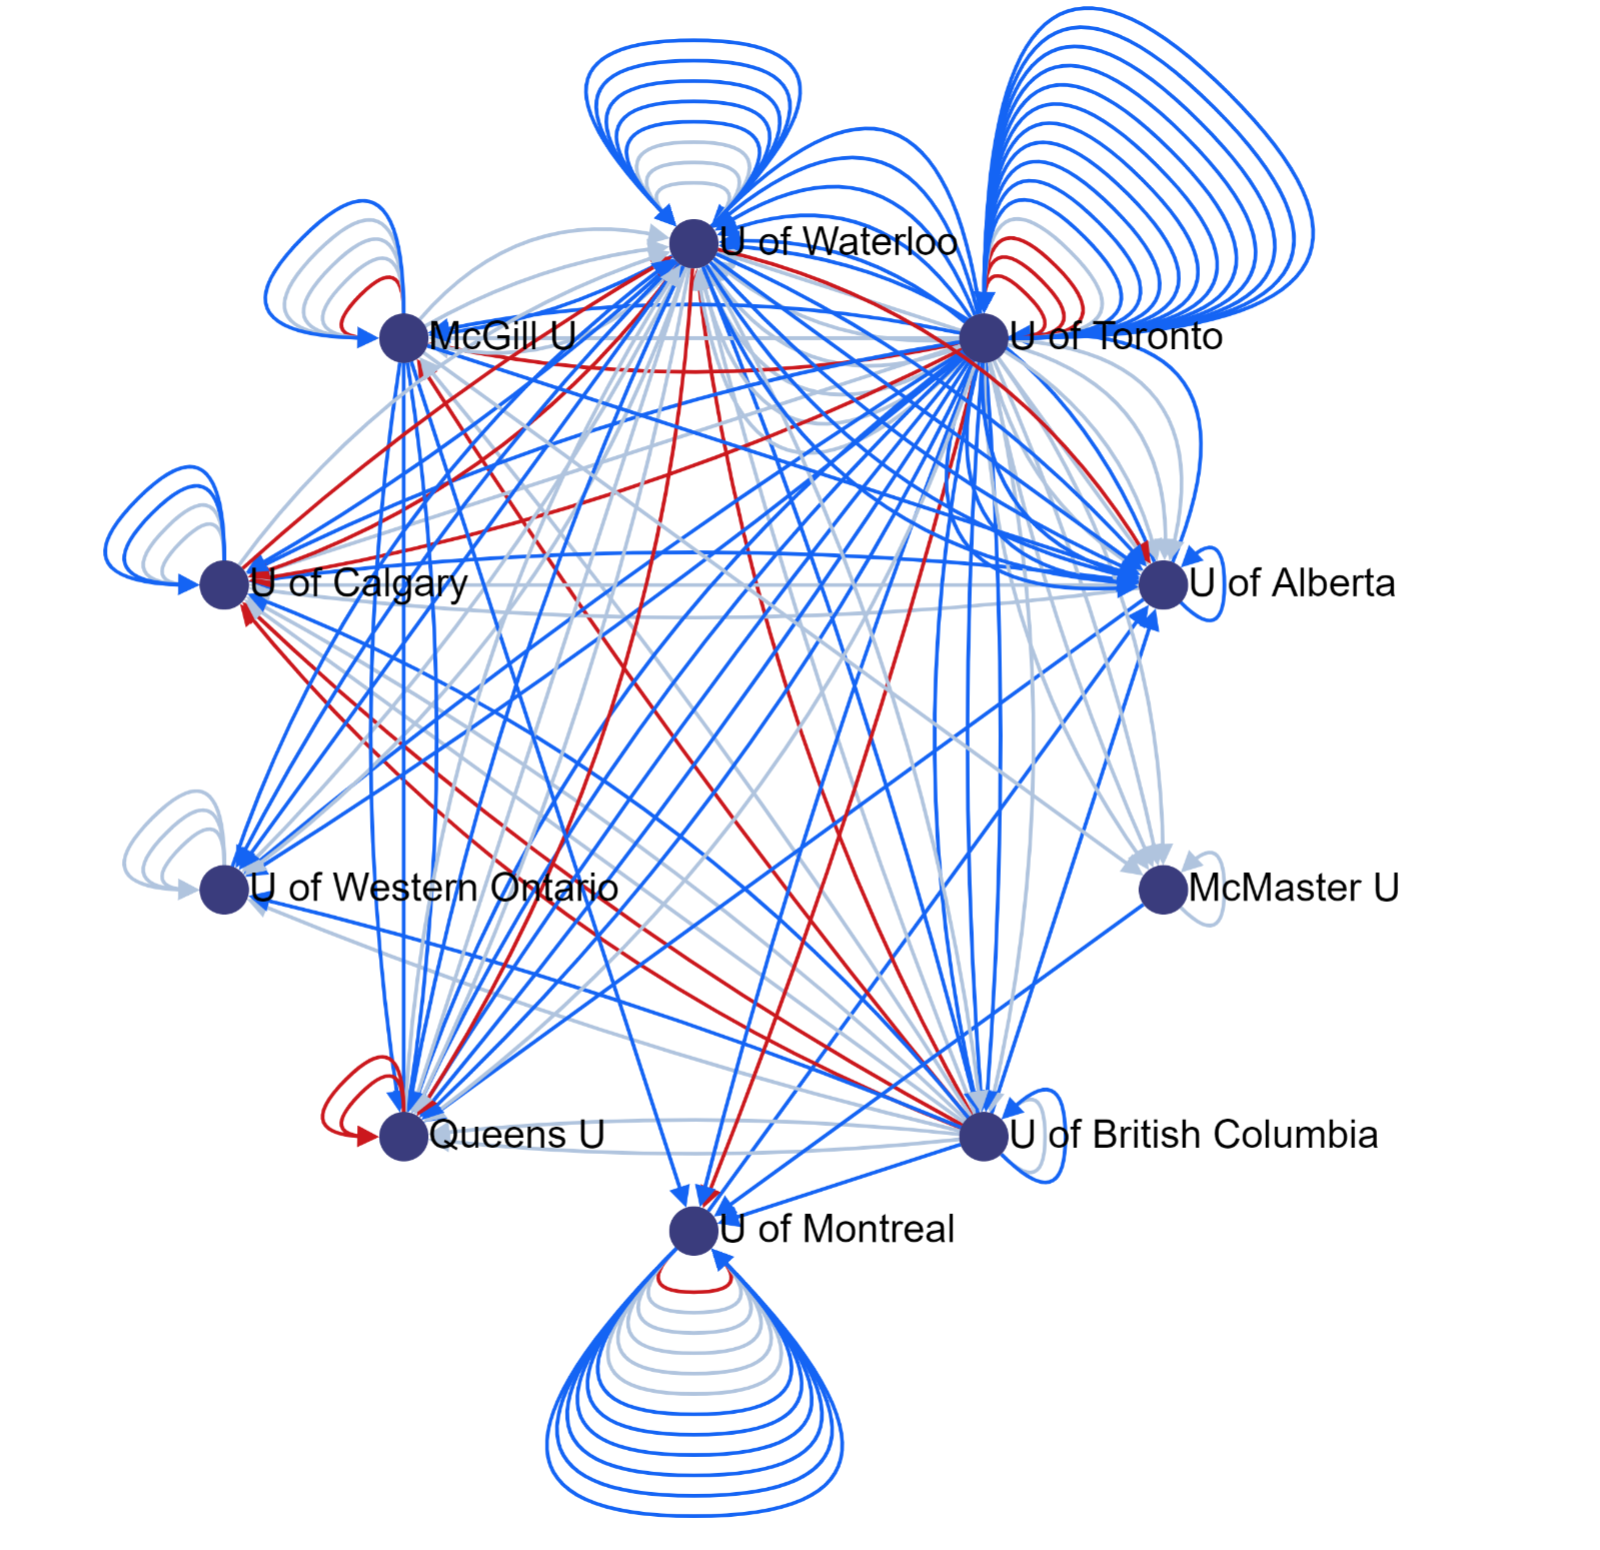

In [29]:
from IPython.display import Image
Image(filename='univs-canada.png')

or a gif file:

In [28]:
from IPython.display import IFrame
IFrame(src="https://giphy.com/embed/1dNOr5EtBEbMdOooqU", width=580, height=565)